# Prueba 2: Analizado los crímenes en la Ciudad de Nueva York (Sebastián Rebolledo)

## Hito 1: Aspectos Computacionales

#### En el siguiente trabajo se realizará utilizando una base de datos de la policia de New York y contiene información sobre interrogaciones y detenciones realizadas por ellos. El objetivo es poder reportar la probabilidad de que un sea arrestado o no y predecir si alguna detención terminará en alguna accion violenta.

### Preliminares

- Las metricas que se utilizarán para medir el desempeño de los modelos serán Accuracy, precision y Recall. 
- Se realizará primeramente el analisis de datos perdidos en la base de datos.
- Luego se realizará un preprocesamiento en el vector arstmade .

### Modelos a implementar

- Regresion logistica.

- LinearDiscriminantAnalysis.

- Árbol de clasificación, en donde se implementara una grilla para buscar los mejores hiperparametros. A continuacion grilla tentativa.
    - params = {'max_depth':[10,30,50,70], }
    
- GradientBoostingClasifiers : Se implementara una grilla para buscar los mejores hiperparametros. A continuacion grilla tentativa.
    - params = {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}.
                   
- AdaBoostClassifier: Se implementara una grilla para buscar los mejores hiperparametros. A continuacion grilla tentativa.
     - params = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msngo
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('2009_1perc.csv').drop('Unnamed: 0', axis=1)

In [3]:
df

year  pct  ser_num  datestop  timestop recstat inout trhsloc  perobs  \
0     2009   41     1779   4032009       130       A     O       P     1.0   
1     2009  108     5805  10292009      1050       A     O       P     3.0   
2     2009   43     8340  10062009      1450       1     O       P     1.0   
3     2009   77      932   1232009      1843       A     O       P     5.0   
4     2009  110    11224  12132009      1655       A     O       P     3.0   
...    ...  ...      ...       ...       ...     ...   ...     ...     ...   
5807  2009   52     3719   3282009       210       A     O       P     1.0   
5808  2009   79    15751   9292009      2008       A     O       P     3.0   
5809  2009   69     3024   6262009      1937       1     O       P     1.0   
5810  2009   76     1303   3102009        59       1     O       H     1.0   
5811  2009   10     1018   5142009        40       1     O       H     5.0   

               crimsusp  ...  zip addrpct sector beat post   xcoord   ycoord  \
0                   CPW  ...           41      G    7       1013067  0238633   
1                  BURG  ...          108      J            1012043  0212157   
2                  MISD  ...           43      E            1017599  0240200   
3                   MIS  ...           77      J    4   35  1002625  0183442   
4                   CPW  ...          110      H            1024535  0209890   
...                 ...  ...  ...     ...    ...  ...  ...      ...      ...   
5807            ASSAULT  ...           52      A            1009910  0255837   
5808                CPW  ...           79      F   17       1001545  0192836   
5809                FEL  ...           69      B            1012860  0174682   
5810  CPM MISD  PSA#771  ...           76      A   10       0981820  0185424   
5811               CPCS  ...           10      D            0984003  0212087   

     dettypcm  linecm  detailcm  
0          CM       1        20  
1          CM       1        14  
2          CM       1        20  
3          CM       1        24  
4          CM       1        20  
...       ...     ...       ...  
5807       CM       1         9  
5808       CM       1        20  
5809       CM       1        85  
5810       CM       1        27  
5811       CM       1        24  

[5812 rows x 111 columns]

### Analisis de datos perdidos

<AxesSubplot:>

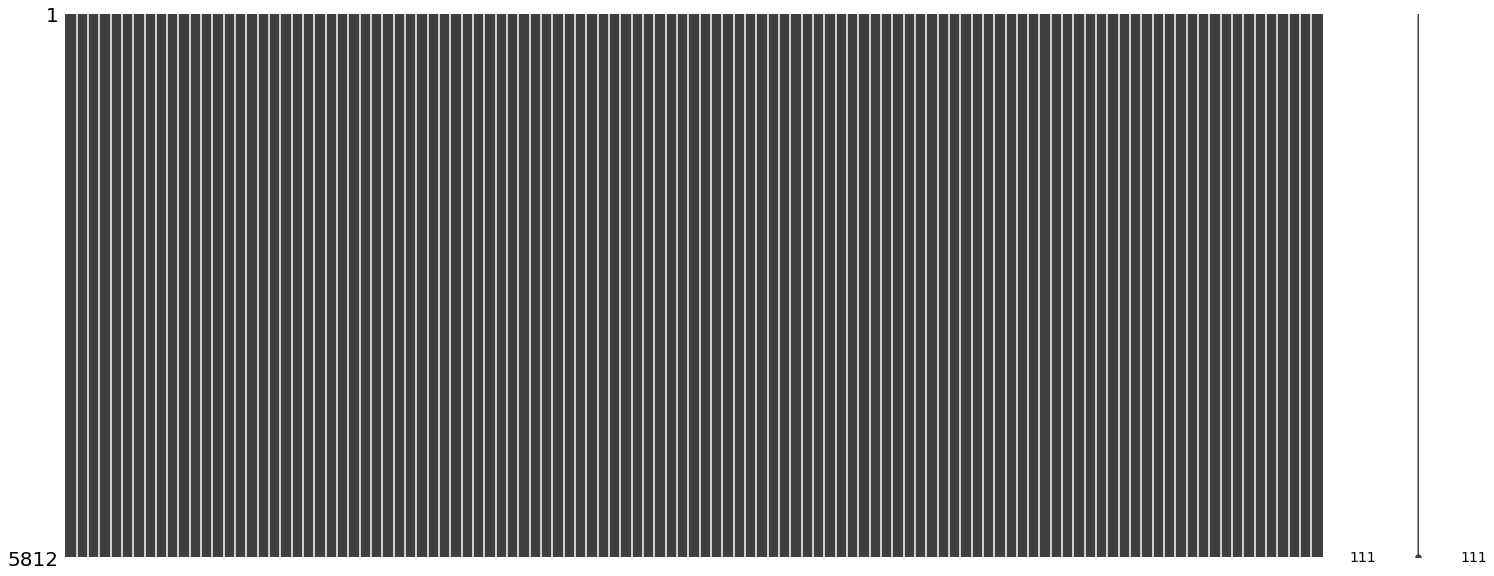

In [4]:
msngo.matrix(df)

In [5]:
df.zip.value_counts()

     5812
Name: zip, dtype: int64

El grafico superior nos indica que no hay valores perdidos, pero observando el dataset nos podemos dar cuenta de que hay columnas que estan en blanco, rellenadas por espacios (' '), lo que genera que el grafico de arriba nos entregue mal la información.
Se recodificarán los espacios (' ') por NaN y se repetirá la busqueda de datos perdidos.

In [6]:
for cols in df.columns:
    df[cols]=np.where(df[cols]==' ', np.nan, df[cols])

In [7]:
df

year    pct  ser_num    datestop  timestop recstat inout trhsloc  \
0     2009.0   41.0   1779.0   4032009.0     130.0       A     O       P   
1     2009.0  108.0   5805.0  10292009.0    1050.0       A     O       P   
2     2009.0   43.0   8340.0  10062009.0    1450.0       1     O       P   
3     2009.0   77.0    932.0   1232009.0    1843.0       A     O       P   
4     2009.0  110.0  11224.0  12132009.0    1655.0       A     O       P   
...      ...    ...      ...         ...       ...     ...   ...     ...   
5807  2009.0   52.0   3719.0   3282009.0     210.0       A     O       P   
5808  2009.0   79.0  15751.0   9292009.0    2008.0       A     O       P   
5809  2009.0   69.0   3024.0   6262009.0    1937.0       1     O       P   
5810  2009.0   76.0   1303.0   3102009.0      59.0       1     O       H   
5811  2009.0   10.0   1018.0   5142009.0      40.0       1     O       H   

      perobs           crimsusp  ...  zip addrpct sector beat post   xcoord  \
0        1.0                CPW  ...  NaN    41.0      G    7  NaN  1013067   
1        3.0               BURG  ...  NaN   108.0      J  NaN  NaN  1012043   
2        1.0               MISD  ...  NaN    43.0      E  NaN  NaN  1017599   
3        5.0                MIS  ...  NaN    77.0      J    4   35  1002625   
4        3.0                CPW  ...  NaN   110.0      H  NaN  NaN  1024535   
...      ...                ...  ...  ...     ...    ...  ...  ...      ...   
5807     1.0            ASSAULT  ...  NaN    52.0      A  NaN  NaN  1009910   
5808     3.0                CPW  ...  NaN    79.0      F   17  NaN  1001545   
5809     1.0                FEL  ...  NaN    69.0      B  NaN  NaN  1012860   
5810     1.0  CPM MISD  PSA#771  ...  NaN    76.0      A   10  NaN  0981820   
5811     5.0               CPCS  ...  NaN    10.0      D  NaN  NaN  0984003   

       ycoord dettypcm  linecm  detailcm  
0     0238633       CM     1.0      20.0  
1     0212157       CM     1.0      14.0  
2     0240200       CM     1.0      20.0  
3     0183442       CM     1.0      24.0  
4     0209890       CM     1.0      20.0  
...       ...      ...     ...       ...  
5807  0255837       CM     1.0       9.0  
5808  0192836       CM     1.0      20.0  
5809  0174682       CM     1.0      85.0  
5810  0185424       CM     1.0      27.0  
5811  0212087       CM     1.0      24.0  

[5812 rows x 111 columns]

<AxesSubplot:>

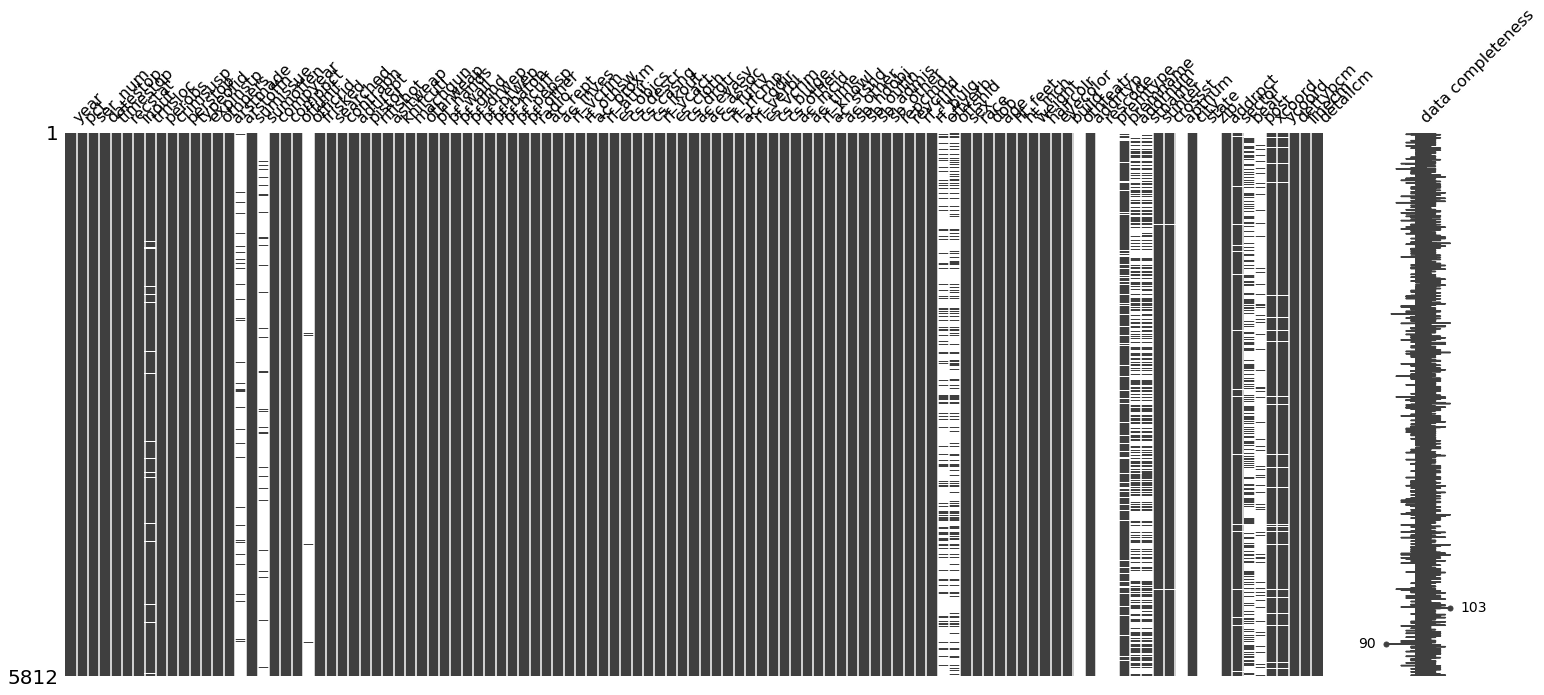

In [8]:
msngo.matrix(df, labels=True)

Se eliminarán las columnas no tienen valores

In [13]:
df=df.drop(['zip','state','city', 'crossst', 'premname','aptnum', 'rescode', 'build', 'premtype', 'othfeatr',
           'officrid', 'sumoffen','post','beat'], axis=1)

<AxesSubplot:>

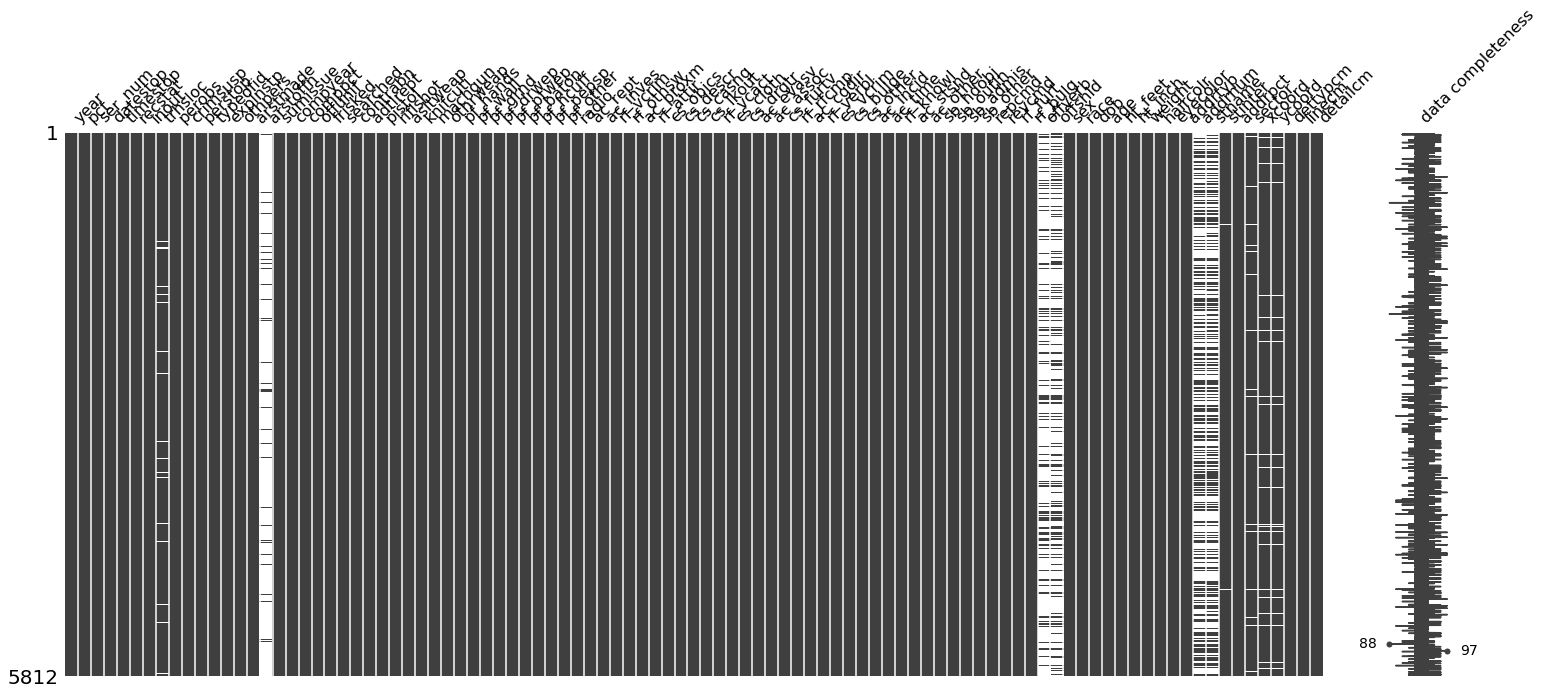

In [14]:
msngo.matrix(df, labels=True)

A continuación se eliminarán las columnas que no sirven para predecir si el procedimiento concluira en arresto, debido a que estas ocurren posterior a la detención y las que le indican al modelo cuando se genero un arresto.

In [15]:
df=df.drop(['offverb', 'offshld','addrnum', 'detailcm','frisked', 'searched', 'contrabn', 'adtlrept',
           'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'offshld','arstoffn','compyear',
           'contrabn'], axis=1)

Se refactoriza la columna 'stname', quitando los valores perdidos y agregando la clase 'no registration'

In [16]:
df['stname'] = np.where(df['stname'].isna(), 'no registration', df['stname'])

<AxesSubplot:>

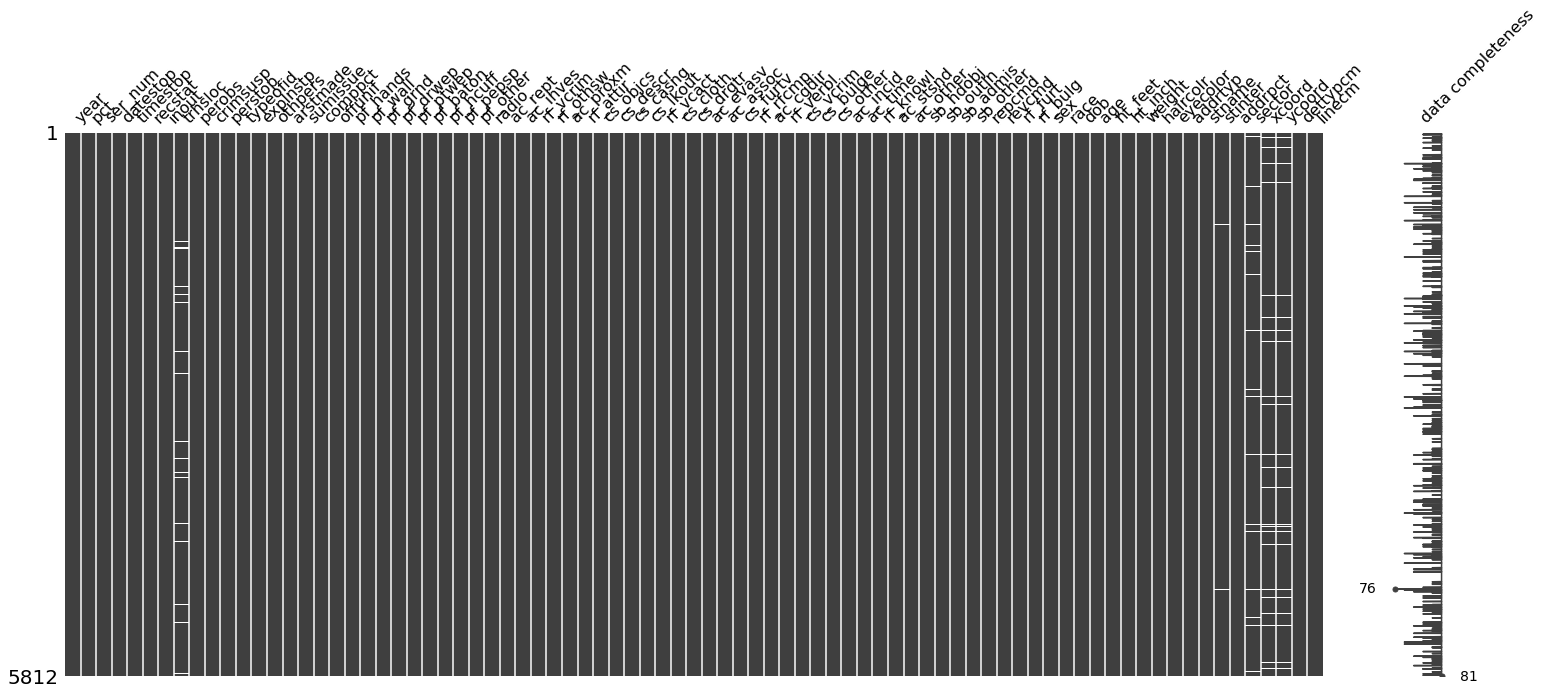

In [17]:
msngo.matrix(df, labels=True)

A continuacion se eliminarán las filas con datos perdidos.

In [23]:
df=df.dropna()

<AxesSubplot:>

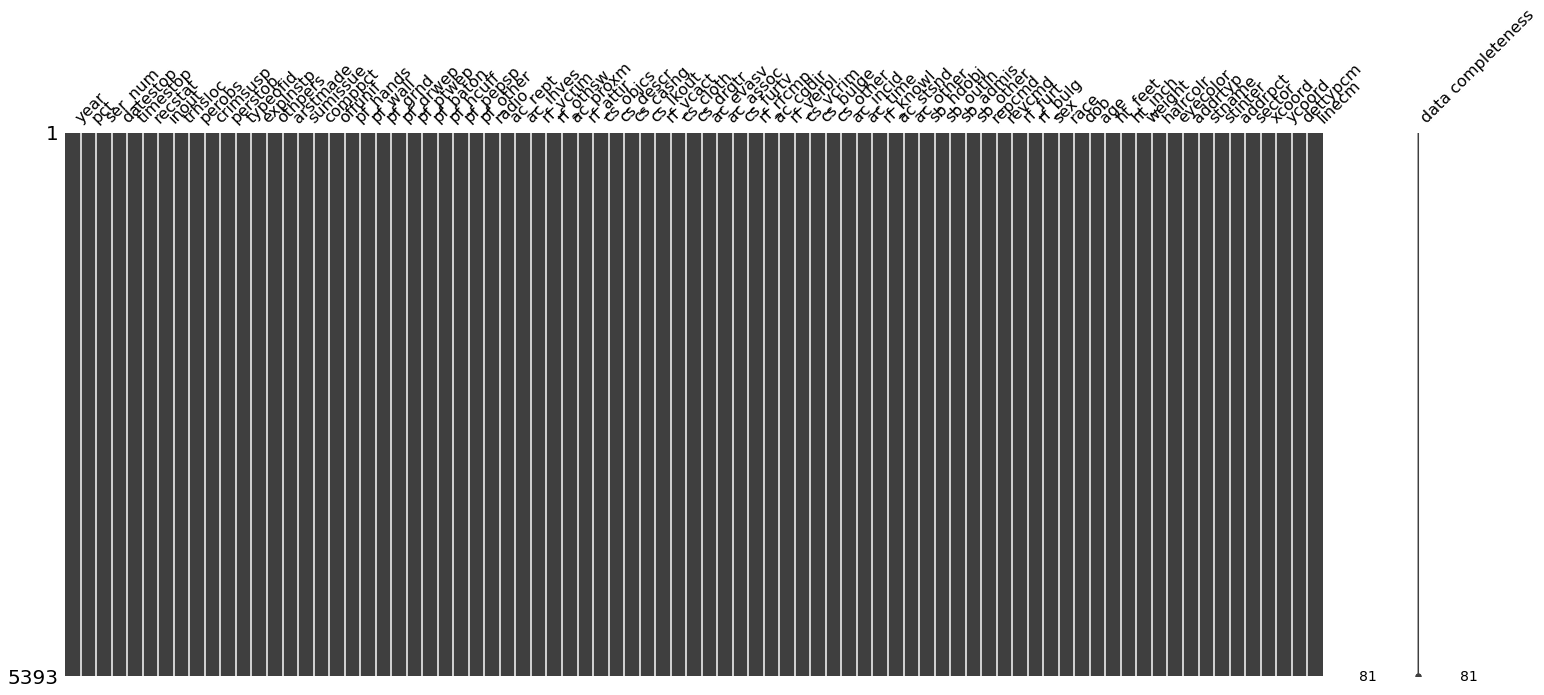

In [24]:
msngo.matrix(df, labels=True)

### Grafico del vector objetivo

In [18]:
sns.countplot(x='arstmade', data=df)
plt.title('Distribución Arsmade')
plt.show()

Se observa una gran diferencia en la frecuencia entre las clases Yes y No, en donde Yes es la que presenta una menor cantidad. 

In [19]:
df.arstmade.value_counts()

N    5464
Y     348
Name: arstmade, dtype: int64

En terminos de porcentaje, el 94% de los datos en el vector arsmade corresponde a No (No se realizaron arrestos) y un 6% corresponde a Yes (Si se realizaron arrestos) luego de la detención. 